In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.io import ascii
import random
import scipy.stats as sps
import pandas as pd


In [59]:
#reading in OSSOS data and SurveySim data

# main ossos data
data = ascii.read('survey',header_start=0,data_start=1)

# ossos 3:2 objects with phi and libration amplitude
phi_la = ascii.read('ossos_phi_la.txt',header_start=0,data_start=1)
print(data.colnames)

# survey sim output files with libration amplitude and phi
rebound1 = ascii.read('oct13_2_la_track.dat')
rebound2 = ascii.read('oct13_2_phi_track.dat')
print(' ')

print(rebound1.colnames)

['cl', 'p', 'j', 'k', 'sh', 'object', 'mag', 'e_mag', 'Filt', 'Hsur', 'dist', 'e_dist', 'Nobs', 'time', 'av_xres', 'av_yres', 'max_x', 'max_y', 'a', 'e_a', 'e', 'e_e', 'i', 'e_i', 'Omega', 'e_Omega', 'omega', 'e_omega', 'tperi', 'e_tperi', 'RAdeg', 'DEdeg', 'JD', 'rate', 'MPC']
 
['a', 'e', 'i', 'q', 'r', 'M', 'm_rand', 'H_rand', 'color', 'Comments']



# Extracting the 3:2 MMR OSSOS objects from total survey

In [60]:
j = data['j']
k = data['k']

#orbital parameters for total OSSOS Survey Data
H_tot = np.sort(data['Hsur'])
a_tot = np.sort(data['a'])
e_tot = np.sort(data['e'])
i_tot = np.sort(data['i'])
C_tot = np.arange(1, len(H_tot)+1)/len(H_tot)

#extracting the 3:2 objects
list1 = []
for i, x in enumerate(j):
    if x == 3.:
        list1.append(i)

list2 = []
for i in list1:
    if k[i] == 2.:
        list2.append(i)

# creating arrays of 3:2 orbital parameters

a = []
e = []
i = []
H = []
for x in list2:
    a.append(data['a'][x])
    e.append(data['e'][x])
    i.append(data['i'][x])
    
for x in list2:
    if data['Filt'][x] == 'r':
        H.append(data['Hsur'][x])
    if data['Filt'][x] == 'g':
        H.append(data['Hsur'][x] - 0.65)
        
print(len(j))

539


# Sorting arrays of orbital elements to plot CDFs

In [61]:
a_2 = rebound1['a']
e_2 = rebound1['e']
i_2 = rebound1['i']


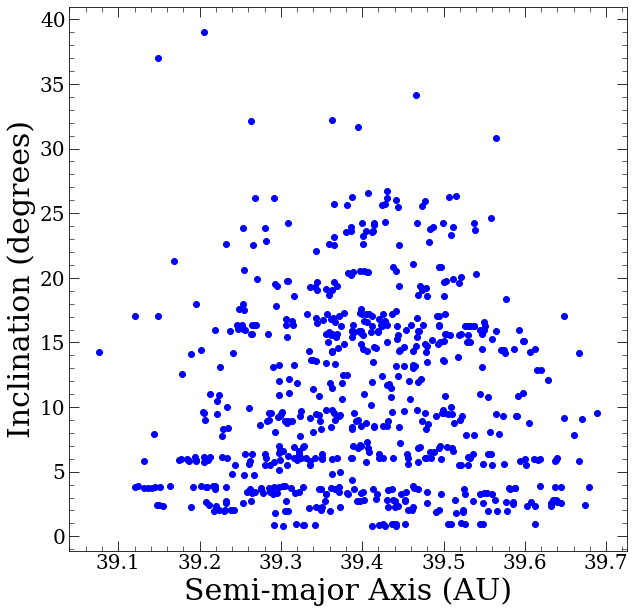

In [62]:
plt.figure(figsize=(10,10))
plt.rc('font', family='serif')
plt.scatter(a_2,i_2,color='blue')
plt.xlabel('Semi-major Axis (AU)',fontsize=30)
plt.ylabel('Inclination (degrees)',fontsize=30)
#plt.title('Rebound 3:2 a vs i',fontsize=24)
plt.minorticks_on()
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tick_params(which='major',bottom='on',top='on',left='on',right='on',direction='in',length=10)
plt.tick_params(which='minor',bottom='on',top='on',left='on',right='on',direction='in',length=5)
#plt.savefig('af_01_ai.jpg',bbox_inches='tight')


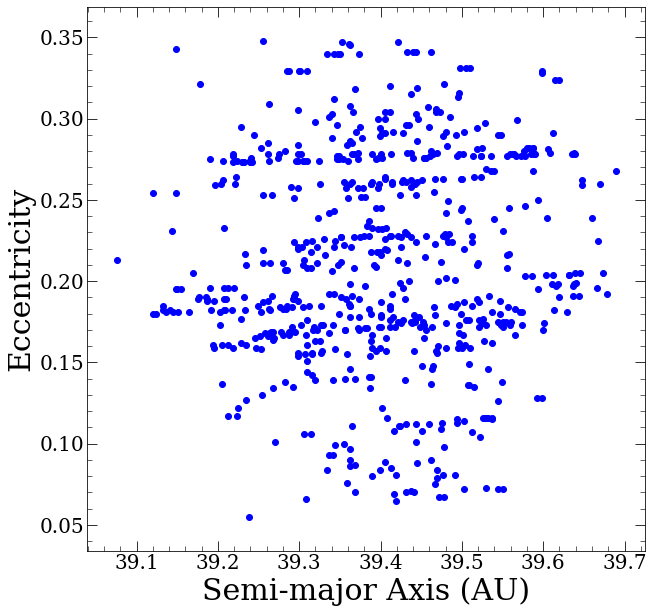

In [63]:
plt.figure(figsize=(10,10))
plt.rc('font', family='serif')
plt.scatter(a_2,e_2,color='blue')
plt.xlabel('Semi-major Axis (AU)',fontsize=30)
plt.ylabel('Eccentricity',fontsize=30)
#plt.title('Rebound 3:2 a vs e',fontsize=24)
plt.minorticks_on()
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tick_params(which='major',bottom='on',top='on',left='on',right='on',direction='in',length=10)
plt.tick_params(which='minor',bottom='on',top='on',left='on',right='on',direction='in',length=5)
#plt.savefig('af_01_ae.jpg',bbox_inches='tight')


In [65]:

#rebound data
a_2 = np.sort(rebound1['a'])
e_2 = np.sort(rebound1['e'])
i_2 = np.sort(rebound1['i'])
H_2 = np.sort(rebound1['H_rand'])
phi_2 = np.sort(rebound2['Comments'])
la_2 = np.sort(rebound1['Comments'])
C2 = np.arange(1,len(a_2)+1)/len(a_2)

#OSSOS 3:2 data
a = np.sort(a)
e = np.sort(e)
i = np.sort(i)
H = np.sort(H)
C = np.arange(1, len(a)+1)/len(a)

phi = np.sort(phi_la['phi'])
la = np.sort(phi_la['la'])
C_phi_la = np.arange(1,len(phi)+1)/len(phi)

print(len(a_2))
print(len(phi))

671
44


# CDF of Semi-Major Axis

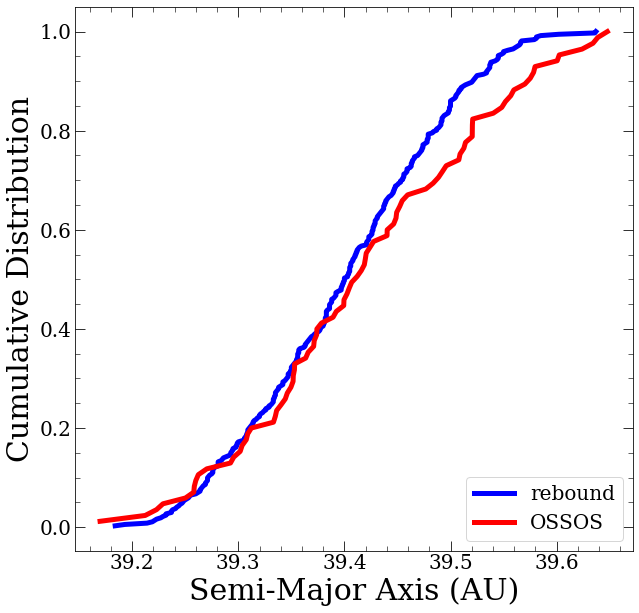

In [48]:
plt.figure(figsize=(10,10))
plt.plot(a_2,C2,label='rebound',color='blue',linewidth=5)
plt.plot(a,C,label='OSSOS',color='red',linewidth=5)
plt.xlabel('Semi-Major Axis (AU)',fontsize=30)
plt.ylabel('Cumulative Distribution',fontsize=30)
#plt.title('OSSOS vs Model Semi-Major Axis',fontsize=24)
plt.minorticks_on()
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tick_params(which='major',bottom='on',top='on',left='on',right='on',direction='in',length=10)
plt.tick_params(which='minor',bottom='on',top='on',left='on',right='on',direction='in',length=5)
plt.legend(loc=4,fontsize=20)
plt.savefig('oct10_a.jpg', bbox_inches='tight')


# CDF of Eccentricity

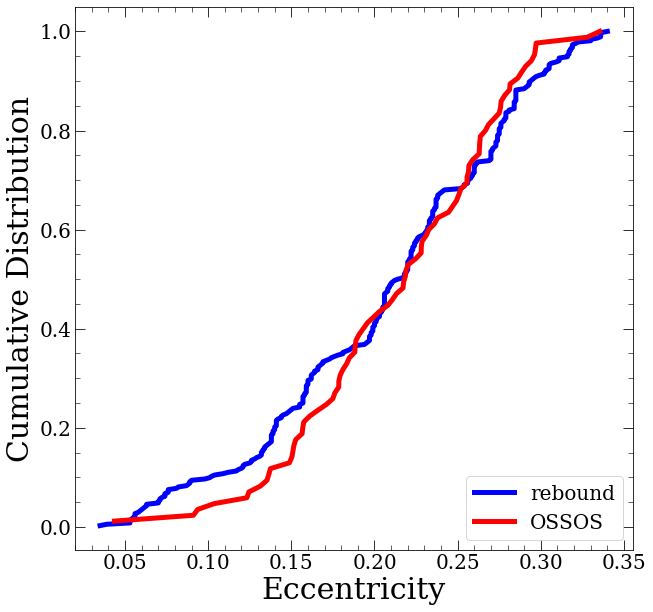

In [49]:
plt.figure(figsize=(10,10))
#plt.plot(e_1,C1,label='SPL Model',color='blue',linewidth=5)
plt.plot(e_2,C2,label='rebound',color='blue',linewidth=5)
plt.plot(e,C,label='OSSOS',color='red',linewidth=5)
plt.xlabel('Eccentricity',fontsize=30)
plt.ylabel('Cumulative Distribution',fontsize=30)
#plt.title('OSSOS vs Model Eccentricity',fontsize=24)
plt.minorticks_on()
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tick_params(which='major',bottom='on',top='on',left='on',right='on',direction='in',length=10)
plt.tick_params(which='minor',bottom='on',top='on',left='on',right='on',direction='in',length=5)
plt.legend(loc=4,fontsize=20)
plt.savefig('oct10_e.jpg', bbox_inches='tight')


# CDF of Inclination

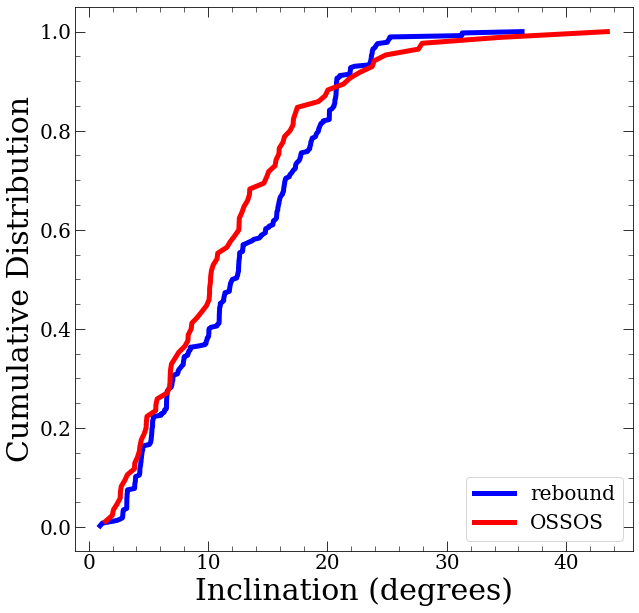

In [50]:
plt.figure(figsize=(10,10))
#plt.plot(i_1,C1,label='SPL Model',linewidth=5,color='blue')
plt.plot(i_2,C2,label='rebound',linewidth=5,color='blue')
plt.plot(i,C,label='OSSOS',linewidth=5,color='red')
plt.xlabel('Inclination (degrees)',fontsize=30)
plt.ylabel('Cumulative Distribution',fontsize=30)
#plt.title('OSSOS vs Model Inclination',fontsize=34)
plt.minorticks_on()
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tick_params(which='major',bottom='on',top='on',left='on',right='on',direction='in',length=10)
plt.tick_params(which='minor',bottom='on',top='on',left='on',right='on',direction='in',length=5)
plt.legend(loc=4,fontsize=20)
plt.savefig('oct10_i.jpg', bbox_inches='tight')


# CDF of H Magnitude

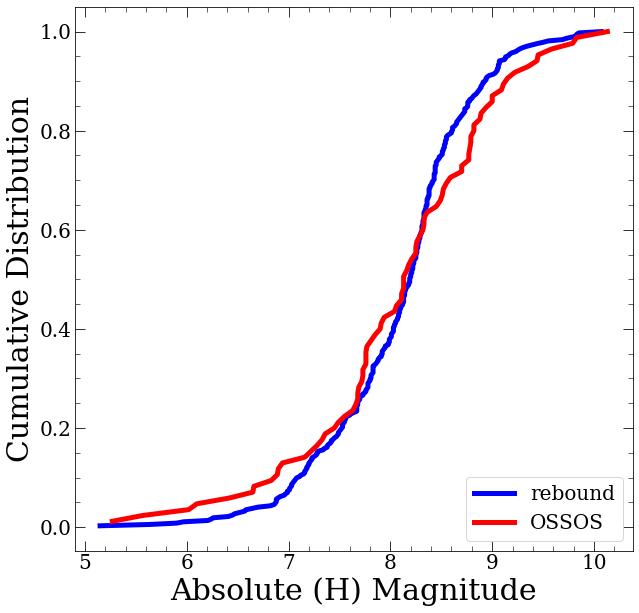

In [51]:
plt.figure(figsize=(10,10))
plt.plot(H_2,C2,label='rebound',linewidth=5,color='blue')
plt.plot(H,C,label='OSSOS',color='red',linewidth=5)
plt.xlabel('Absolute (H) Magnitude',fontsize=30)
plt.ylabel('Cumulative Distribution',fontsize=30)
#plt.title('OSSOS vs Model H Magnitude',fontsize=24)
plt.minorticks_on()
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tick_params(which='major',bottom='on',top='on',left='on',right='on',direction='in',length=10)
plt.tick_params(which='minor',bottom='on',top='on',left='on',right='on',direction='in',length=5)
plt.legend(loc=4,fontsize=20)
plt.savefig('oct10_H.jpg',bbox_inches='tight')


# CDF of phi

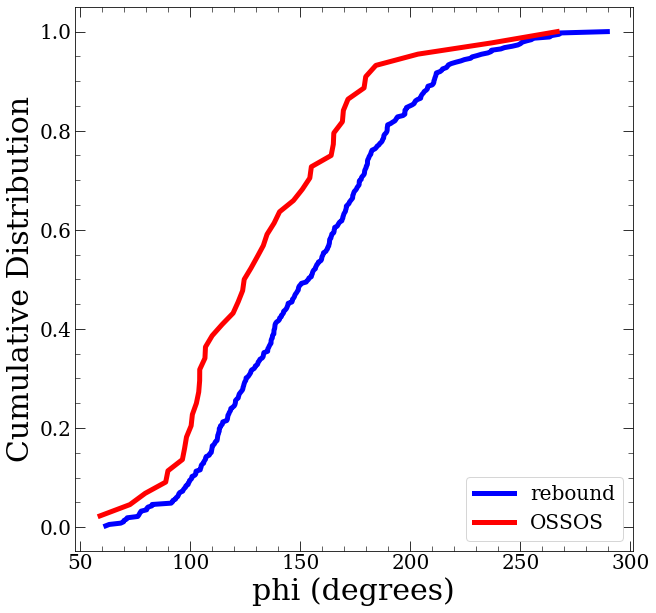

In [52]:
plt.figure(figsize=(10,10))
plt.plot(phi_2,C2,label='rebound',linewidth=5,color='blue')
plt.plot(phi,C_phi_la,label='OSSOS',color='red',linewidth=5)
plt.xlabel('phi (degrees)',fontsize=30)
plt.ylabel('Cumulative Distribution',fontsize=30)
#plt.title('OSSOS vs Model Resonance Angle',fontsize=24)
plt.minorticks_on()
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tick_params(which='major',bottom='on',top='on',left='on',right='on',direction='in',length=10)
plt.tick_params(which='minor',bottom='on',top='on',left='on',right='on',direction='in',length=5)
plt.legend(loc=4,fontsize=20)
plt.savefig('oct10_phi.jpg',bbox_inches='tight')

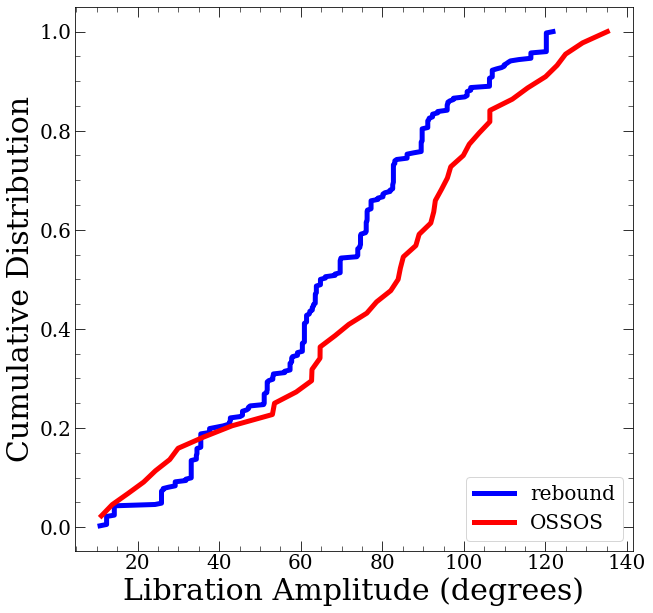

In [53]:
plt.figure(figsize=(10,10))
plt.plot(la_2,C2,label='rebound',linewidth=5,color='blue')
plt.plot(la,C_phi_la,label='OSSOS',color='red',linewidth=5)
plt.xlabel('Libration Amplitude (degrees)',fontsize=30)
plt.ylabel('Cumulative Distribution',fontsize=30)
#plt.title('OSSOS vs Model Libration Amplitude',fontsize=24)
plt.minorticks_on()
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tick_params(which='major',bottom='on',top='on',left='on',right='on',direction='in',length=10)
plt.tick_params(which='minor',bottom='on',top='on',left='on',right='on',direction='in',length=5)
plt.legend(loc=4,fontsize=20)
plt.savefig('oct10_la.jpg',bbox_inches='tight')

In [54]:
print(len(a_2))


372


# MonteCarlo Sampling of KS tests of orbital elements

In [55]:
print('broken power law results:')
print('semimajor axis:',sps.ks_2samp(a_2,a))
print('eccentricity:',sps.ks_2samp(e_2,e))
print('inclination:',sps.ks_2samp(i_2,i))
print('H_magnitude:',sps.ks_2samp(H_2,H))
print('phi:',sps.ks_2samp(phi_2,phi))
print('la:',sps.ks_2samp(la_2,la))


broken power law results:
semimajor axis: Ks_2sampResult(statistic=0.14693232131562306, pvalue=0.09154457032027855)
eccentricity: Ks_2sampResult(statistic=0.11353573687539531, pvalue=0.315933276592078)
inclination: Ks_2sampResult(statistic=0.14433902593295383, pvalue=0.10197121804463888)
H_magnitude: Ks_2sampResult(statistic=0.1281151170145478, pvalue=0.19159280713523202)
phi: Ks_2sampResult(statistic=0.23875855327468232, pvalue=0.01846948449150138)
la: Ks_2sampResult(statistic=0.26466275659824046, pvalue=0.006324433127508806)


In [56]:
Da = sps.ks_2samp(a_2,a)[0]
De = sps.ks_2samp(e_2,e)[0]
Di = sps.ks_2samp(i_2,i)[0]
Dh = sps.ks_2samp(H_2,H)[0]
Dphi = sps.ks_2samp(phi_2,phi)[0]
Dla = sps.ks_2samp(la_2,la)[0]


In [57]:
D_a = []
D_e = []
D_i = []
D_H = []
D_phi = []
D_la = []

N = 100000.
    
def MonteCarlo_KS(N,model,D,data):
    l = len(data)
    while len(D) < N:
        sample = random.choices(model,k=l)
        D.append(sps.ks_2samp(sample,model)[0])
                
def calculate_p(D_array,D_val,N):
    vals = []
    for i in D_array:
        if i < D_val:
            vals.append(i)
    l = len(vals)
    p = (1-(l/N))
    
    return(p)     


In [58]:
MonteCarlo_KS(N,a_2,D_a,a)
MonteCarlo_KS(N,e_2,D_e,e)
MonteCarlo_KS(N,i_2,D_i,i)
MonteCarlo_KS(N,H_2,D_H,H)
MonteCarlo_KS(N,phi_2,D_phi,phi)
MonteCarlo_KS(N,la_2,D_la,la)

D_a = np.sort(D_a)
D_e = np.sort(D_e)
D_i = np.sort(D_i)
D_H = np.sort(D_H)
D_phi = np.sort(D_phi)
D_la = np.sort(D_la)
C_ks = np.arange(1, N+1)/N


p_a = calculate_p(D_a,Da,N)
p_e = calculate_p(D_e,De,N)
p_i = calculate_p(D_i,Di,N)
p_H = calculate_p(D_H,Dh,N)
p_phi = calculate_p(D_phi,Dphi,N)
p_la = calculate_p(D_la,Dla,N)

print('semi-major axis:',Da,p_a)
print('eccentricity:',De,p_e)
print('inclination:',Di,p_i)
print('magnitude:',Dh,p_H)
print('phi:',Dphi,p_phi)
print('libration amplitude:',Dla,p_la)


semi-major axis: 0.14693232131562306 0.04057999999999995
eccentricity: 0.11353573687539531 0.17891
inclination: 0.14433902593295383 0.04886999999999997
magnitude: 0.1281151170145478 0.09706999999999999
phi: 0.23875855327468232 0.010170000000000012
libration amplitude: 0.26466275659824046 0.0022699999999999942


# Anderson-Darling Test

In [19]:
def ad_stat(model, obs):
    
#     Returns
#     -------
#     A2 : float
#         Based on the NSIT handbook: https://www.itl.nist.gov/div898/handbook/eda/section3/eda35e.htm
#     “”"
    sm = np.sort(model)
    so = np.sort(obs)
    n1=len(sm)
    n2=len(so)
    sm = np.insert(sm,0,0.)
    so = np.insert(so,0, 0.)
    d = 0.
    for i2 in range(1,n2+1):
        i1 = 1
        while(sm[i1] <= so[i2] and i1<n1):
            i1+=1
        if(i1==1):
            stat = 100.
            return stat
        dt = np.log(float(i1-1)/float(n1+1))
        i1=1
        while(sm[i1] <= so[n2+1-i2] and i1<n1):
            i1+=1
        dt+=np.log(1.-float(i1-1)/float(n1+1))
        d+=float(2*i2-1)*dt
    stat = -float(n2) - d/float(n2)
    return stat

# D_a = ad_stat(a_2,a)
# D_e = ad_stat(e_2,e)
# D_i = ad_stat(i_2,i)
# D_H = ad_stat(H_2,H)
# D_phi = ad_stat(phi_2,phi)
# D_la = ad_stat(la_2,la)

D_a = sps.anderson_ksamp([a_2,a],midrank=False).statistic
D_e = sps.anderson_ksamp([e_2,e],midrank=False).statistic
D_i = sps.anderson_ksamp([i_2,i],midrank=False).statistic
D_H = sps.anderson_ksamp([H_2,H],midrank=False).statistic
D_phi = sps.anderson_ksamp([phi_2,phi],midrank=False).statistic
D_la = sps.anderson_ksamp([la_2,la],midrank=False).statistic

Da = []
De = []
Di = []
DH = []
Dphi = []
Dla = []

def MonteCarlo_AD(N,model,D,data):
    l = len(data)
    while len(D) < N:
        sample = random.choices(model,k=l)
        D.append(ad_stat(sample,model))
        
MonteCarlo_AD(N,a_2,Da,a)
MonteCarlo_AD(N,e_2,De,e)
MonteCarlo_AD(N,i_2,Di,i)
MonteCarlo_AD(N,H_2,DH,H)
MonteCarlo_AD(N,phi_2,Dphi,phi)
MonteCarlo_AD(N,la_2,Dla,la)

p_a = calculate_p(Da,D_a,N)
p_e = calculate_p(De,D_e,N)
p_i = calculate_p(Di,D_i,N) 
p_H = calculate_p(DH,D_H,N)
p_phi = calculate_p(Dphi,D_phi,N)
p_la = calculate_p(Dla,D_la,N)
    
print('AD Test Results')
print('semi-major axis: D = ',D_a,' p = ',p_a)
print('eccentricity: D = ',D_e,' p = ',p_e)
print('inclincation: D = ',D_i,' p = ',p_i)
print('H magnitude: D = ',D_H,' p = ',p_H)
print('phi: D = ',D_phi,' p = ',p_phi)
print('libration amplitude: D = ',D_la,' p = ',p_la)

/Users/nihaalz/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: p-value capped: true value larger than 0.25
/Users/nihaalz/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:39: UserWarning: p-value capped: true value larger than 0.25
/Users/nihaalz/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:41: UserWarning: p-value capped: true value larger than 0.25
/Users/nihaalz/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:43: UserWarning: p-value capped: true value larger than 0.25


AD Test Results
semi-major axis: D =  0.1591347763258781  p =  1.0
eccentricity: D =  -0.17322508209274518  p =  1.0
inclincation: D =  0.6313638072875845  p =  1.0
H magnitude: D =  -0.15707202170908785  p =  1.0
phi: D =  2.74553320720234  p =  0.99989
libration amplitude: D =  -0.27846955293333997  p =  1.0


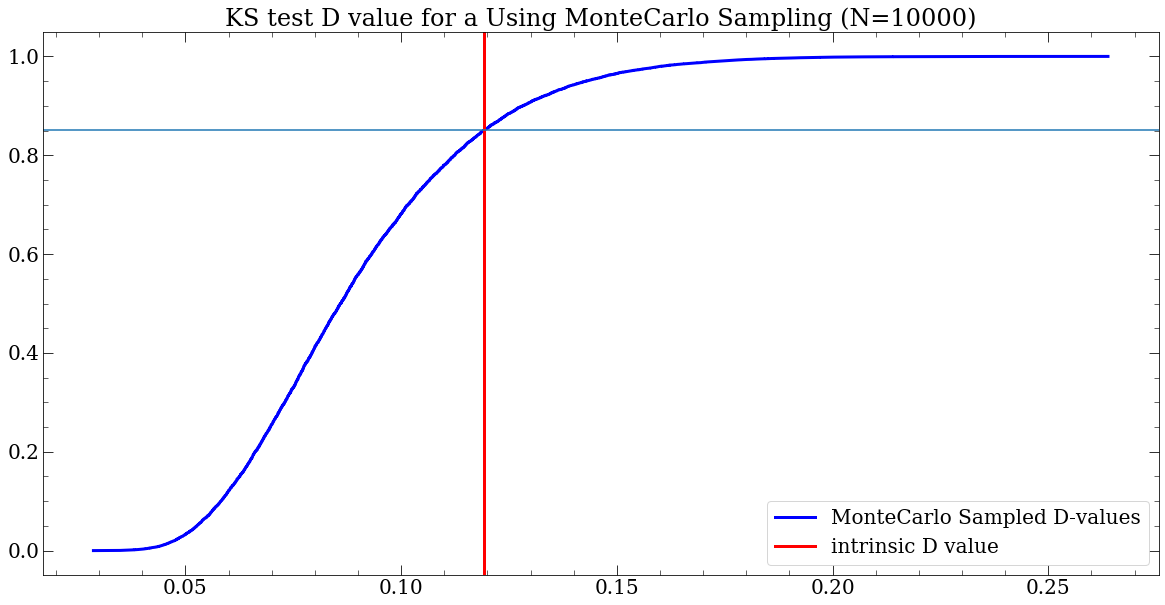

In [47]:
plt.figure(figsize=(20,10))
plt.plot(D_a,C_ks,color='blue',label='MonteCarlo Sampled D-values',linewidth=3)
plt.axvline(x=Da,ymin=0,ymax=1,color='red',linewidth=3.0,label='intrinsic D value')
plt.axhline(y=1-p_a)
plt.minorticks_on()
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tick_params(which='major',bottom='on',top='on',left='on',right='on',direction='in',length=10)
plt.tick_params(which='minor',bottom='on',top='on',left='on',right='on',direction='in',length=5)
plt.title('KS test D value for a Using MonteCarlo Sampling (N=10000)',fontsize=24)
plt.legend(loc=4,fontsize=20)
#plt.savefig('MonteCarlo_a.jpg')


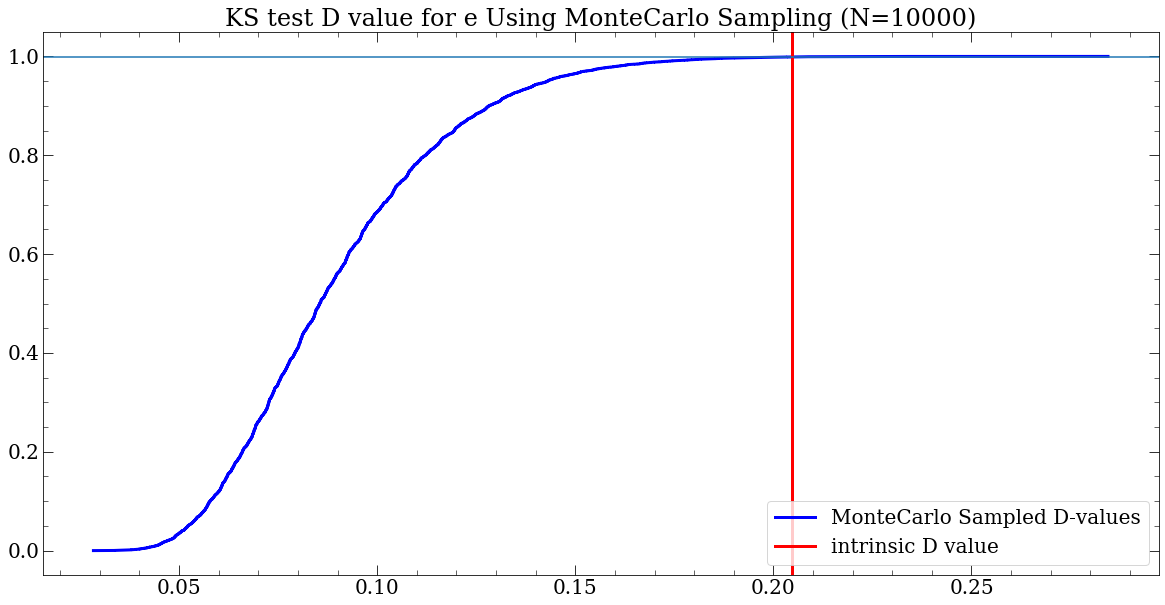

In [90]:
plt.figure(figsize=(20,10))
plt.plot(D_e,C_ks,color='blue',label='MonteCarlo Sampled D-values',linewidth=3)
plt.axvline(x=De,ymin=0,ymax=1,color='red',linewidth=3.0,label='intrinsic D value')
plt.axhline(y=1-p_e)
plt.minorticks_on()
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tick_params(which='major',bottom='on',top='on',left='on',right='on',direction='in',length=10)
plt.tick_params(which='minor',bottom='on',top='on',left='on',right='on',direction='in',length=5)
plt.title('KS test D value for e Using MonteCarlo Sampling (N=10000)',fontsize=24)
plt.legend(loc=4,fontsize=20)
#plt.savefig('MonteCarlo_e.jpg')


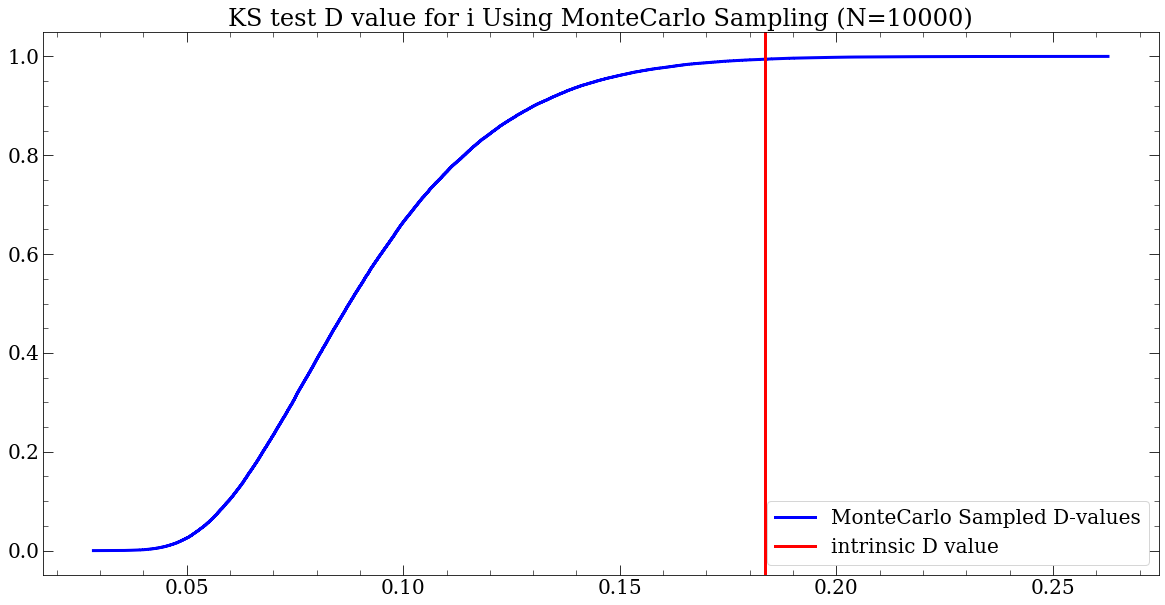

In [91]:
plt.figure(figsize=(20,10))
plt.plot(D_i,C_ks,color='blue',label='MonteCarlo Sampled D-values',linewidth=3)
plt.axvline(x=Di,ymin=0,ymax=1,color='red',linewidth=3.0,label='intrinsic D value')
plt.minorticks_on()
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tick_params(which='major',bottom='on',top='on',left='on',right='on',direction='in',length=10)
plt.tick_params(which='minor',bottom='on',top='on',left='on',right='on',direction='in',length=5)
plt.title('KS test D value for i Using MonteCarlo Sampling (N=10000)',fontsize=24)
plt.legend(loc=4,fontsize=20)
#plt.savefig('MonteCarlo_i.jpg')


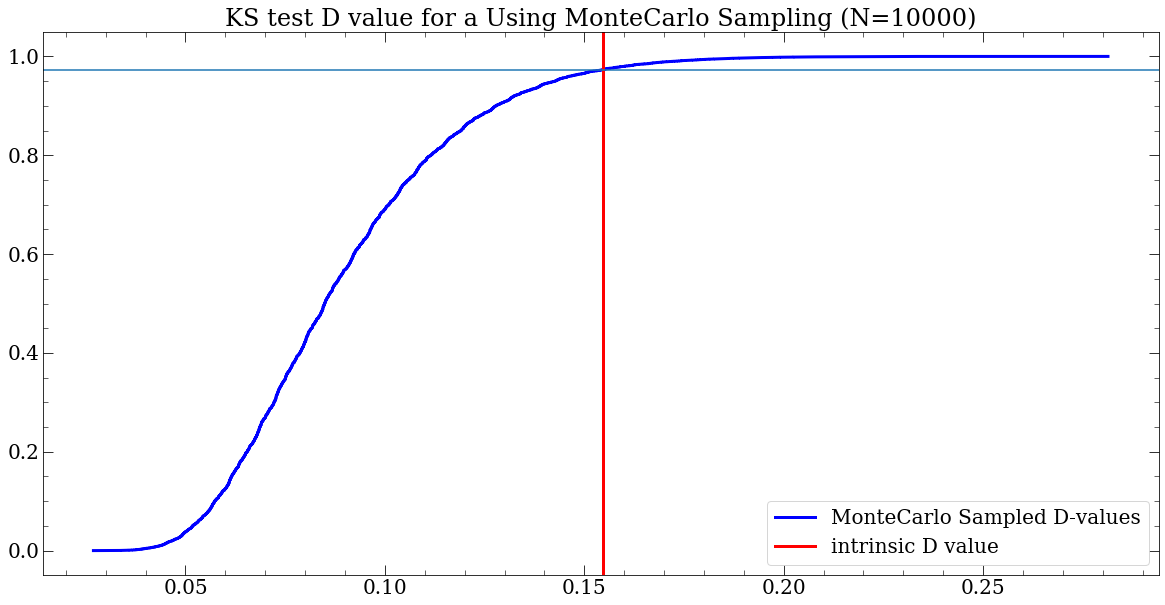

In [92]:
plt.figure(figsize=(20,10))
plt.plot(D_H,C_ks,color='blue',label='MonteCarlo Sampled D-values',linewidth=3)
plt.axvline(x=Dh,ymin=0,ymax=1,color='red',linewidth=3.0,label='intrinsic D value')
plt.minorticks_on()
plt.axhline(y=1-p_H)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tick_params(which='major',bottom='on',top='on',left='on',right='on',direction='in',length=10)
plt.tick_params(which='minor',bottom='on',top='on',left='on',right='on',direction='in',length=5)
plt.title('KS test D value for a Using MonteCarlo Sampling (N=10000)',fontsize=24)
plt.legend(loc=4,fontsize=20)
#plt.savefig('MonteCarlo_H.jpg')


# MonteCarlo test

In [57]:
L1 = np.random.uniform(0,1,500)
L2 = np.random.uniform(0,1,100)
N = 100000

L1 = np.sort(L1)
L2 = np.sort(L2)


In [59]:
KS = sps.ks_2samp(L1,L2)
D = KS[0]
p = KS[1]
print(KS)
print(D)
print(p)


Ks_2sampResult(statistic=0.11000000000000001, pvalue=0.2505081903069432)
0.11000000000000001
0.2505081903069432


In [60]:
D_ks = []

MonteCarlo_KS(N,L1,D_ks,100)

p_ks = calculate_p(D_ks,D,N)

print(p_ks)


0.99838


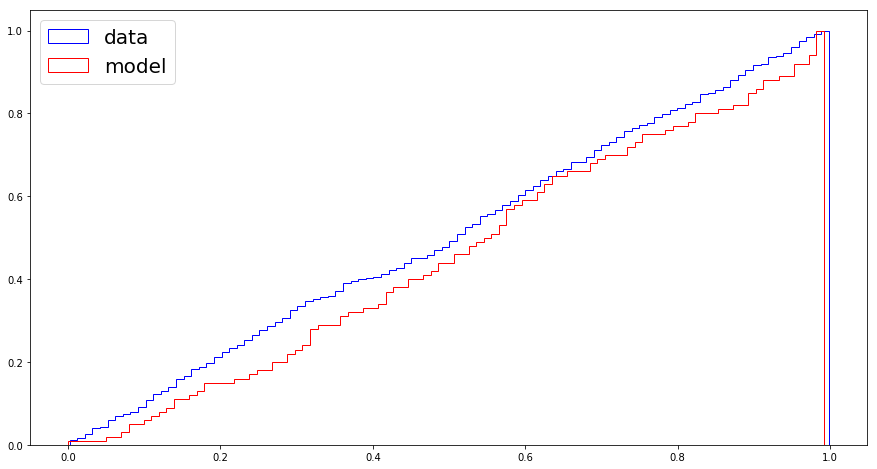

In [61]:
plt.figure(figsize=(15,8))
plt.hist(L1,cumulative=True,density=True,bins=100,histtype='step',color='blue',label='data');
plt.hist(L2,cumulative=True,density=True,bins=100,histtype='step',color='red',label='model');
plt.legend(loc=2,fontsize=20)


In [ ]:
N = np.sqrt((85*220)/(85+220))

D = 0.118717

x = (N + 0.12 + (0.11/N))*D

j = np.arange(1,1000001)

def Q_ks(j,x):
    vals = []
    for i in j:
        z = (-1)**(i-1) * np.exp(-2*(i**2)*(x**2))
        vals.append(z)
    value = 2*np.sum(vals)
    return value

print(Q_ks(j,x))


In [ ]:
mpc_a = MPC.a
mpc_e = MPC.e
mpc_i = MPC.i
mpc_H = MPC.H

obj = []

for i, val in enumerate(mpc_a):
    if val < 42. and val > 37.:
        obj.append(i)
        
a_list = []
e_list = []
i_list = []
H_list = []

for i in obj:
    a_list.append(mpc_a[i])
    e_list.append(mpc_e[i])
    i_list.append(mpc_i[i])
    H_list.append(mpc_H[i])
    

In [ ]:
plt.figure(figsize=(10,10))
plt.rc('font', family='serif')
plt.scatter(a_list,e_list,color='blue')
plt.xlabel('Semi-major Axis (AU)',fontsize=24)
plt.ylabel('Eccentricity',fontsize=24)
plt.title('MPC a vs e (a range: [37,42])',fontsize=24)
plt.minorticks_on()
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.tick_params(which='major',bottom='on',top='on',left='on',right='on',direction='in',length=10)
plt.tick_params(which='minor',bottom='on',top='on',left='on',right='on',direction='in',length=5)
#plt.savefig('MPC_ae.jpg',bbox_inches='tight')


In [ ]:
plt.figure(figsize=(10,10))
plt.rc('font', family='serif')
plt.scatter(a_list,i_list,color='blue')
plt.xlabel('Semi-major Axis (AU)',fontsize=24)
plt.ylabel('Inclination',fontsize=24)
plt.title('MPC a vs i (a range: [37,42])',fontsize=24)
plt.minorticks_on()
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.tick_params(which='major',bottom='on',top='on',left='on',right='on',direction='in',length=10)
plt.tick_params(which='minor',bottom='on',top='on',left='on',right='on',direction='in',length=5)
#plt.savefig('MPC_ai.jpg',bbox_inches='tight')


In [ ]:
a_list = np.sort(a_list)
e_list = np.sort(e_list)
i_list = np.sort(i_list)
H_list = np.sort(H_list)
num = np.arange(1,len(a_list)+1)/len(a_list)


In [ ]:
plt.figure(figsize=(10,10))
plt.plot(a_list,num,color='red',linewidth=5)
plt.xlabel('Semi-Major Axis (AU)',fontsize=24)
plt.ylabel('Cumulative Distribution',fontsize=24)
plt.title('MPC Semi-Major Axis',fontsize=24)
plt.minorticks_on()
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tick_params(which='major',bottom='on',top='on',left='on',right='on',direction='in',length=10)
plt.tick_params(which='minor',bottom='on',top='on',left='on',right='on',direction='in',length=5)
#plt.savefig('MPC_a.jpg', bbox_inches='tight')


In [ ]:
plt.figure(figsize=(10,10))
plt.plot(e_list,num,color='blue',linewidth=5)
plt.xlabel('Eccentricity',fontsize=24)
plt.ylabel('Cumulative Distribution',fontsize=24)
plt.title('MPC Eccentricity',fontsize=24)
plt.minorticks_on()
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tick_params(which='major',bottom='on',top='on',left='on',right='on',direction='in',length=10)
plt.tick_params(which='minor',bottom='on',top='on',left='on',right='on',direction='in',length=5)
#plt.savefig('MPC_e.jpg', bbox_inches='tight')


In [ ]:
plt.figure(figsize=(10,10))
plt.plot(i_list,num,color='green',linewidth=5)
plt.xlabel('Inclination (degrees)',fontsize=24)
plt.ylabel('Cumulative Distribution',fontsize=24)
plt.title('MPC Inclination',fontsize=24)
plt.minorticks_on()
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tick_params(which='major',bottom='on',top='on',left='on',right='on',direction='in',length=10)
plt.tick_params(which='minor',bottom='on',top='on',left='on',right='on',direction='in',length=5)
#plt.savefig('MPC_i.jpg', bbox_inches='tight')


In [ ]:
plt.figure(figsize=(10,10))
plt.plot(H_list,num,color='purple',linewidth=5)
plt.xlabel('Absolute Magnitude',fontsize=24)
plt.ylabel('Cumulative Distribution',fontsize=24)
plt.title('MPC H Magnitude',fontsize=24)
plt.minorticks_on()
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tick_params(which='major',bottom='on',top='on',left='on',right='on',direction='in',length=10)
plt.tick_params(which='minor',bottom='on',top='on',left='on',right='on',direction='in',length=5)
#plt.savefig('MPC_H.jpg', bbox_inches='tight')
